In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./rainfall.csv")

df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.shape

(366, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df["rainfall"] = df["rainfall"].apply(lambda x: 1 if x == "yes" else 0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
rainfall,366.0,0.680328,0.466988,0.0,0.000,1.00,1.000,1.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1


In [8]:
df["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

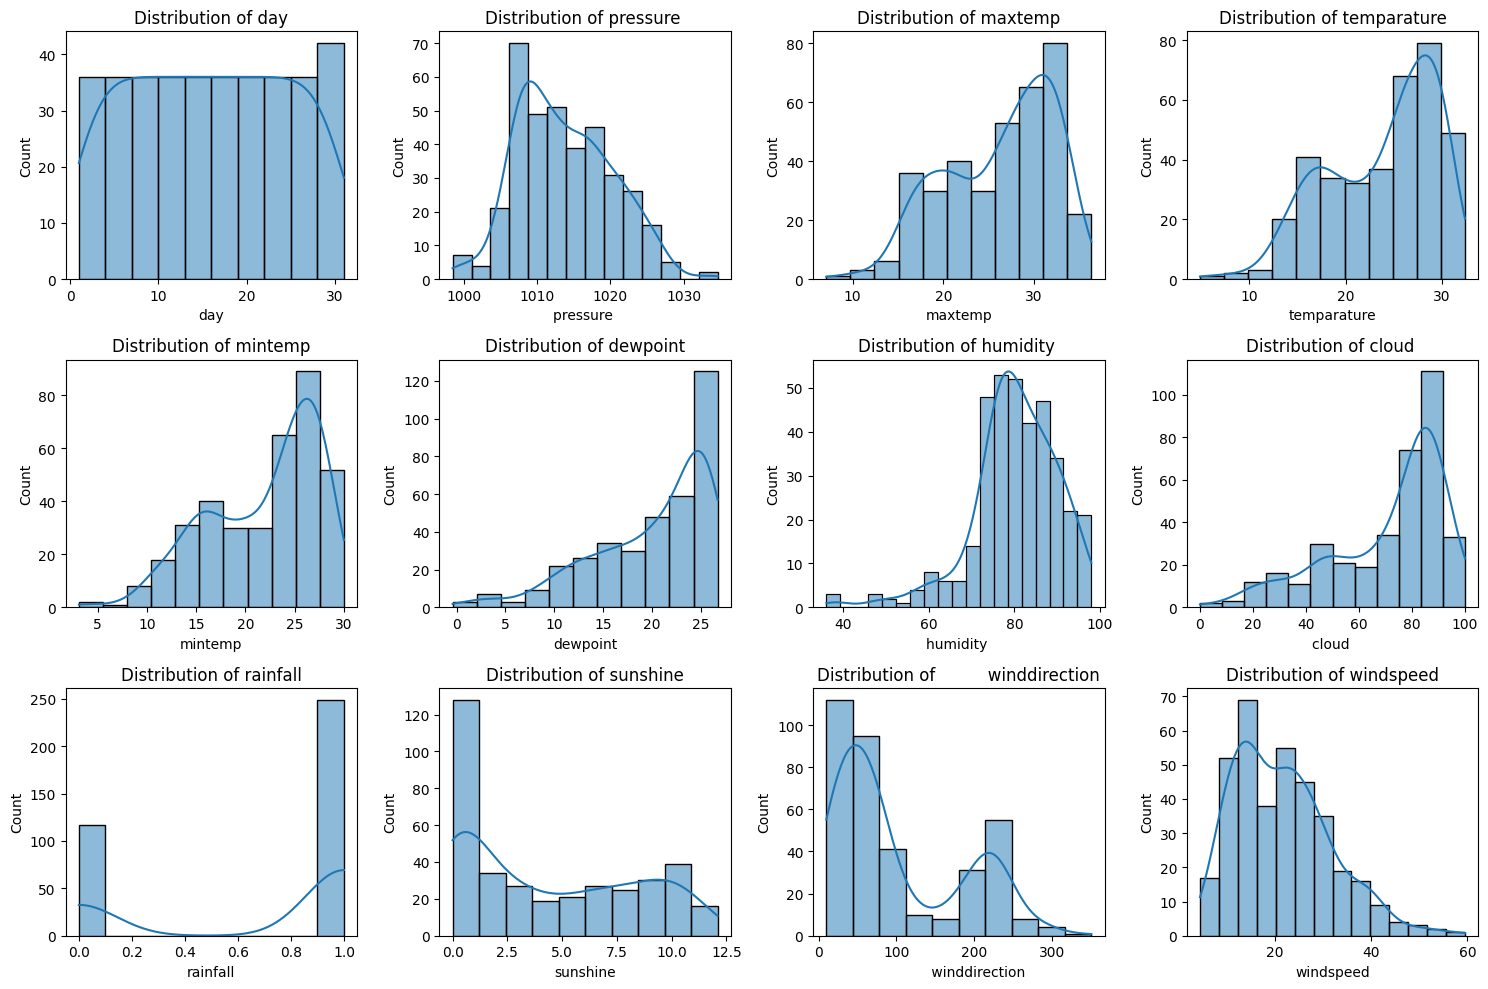

In [9]:
columns = df.columns

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

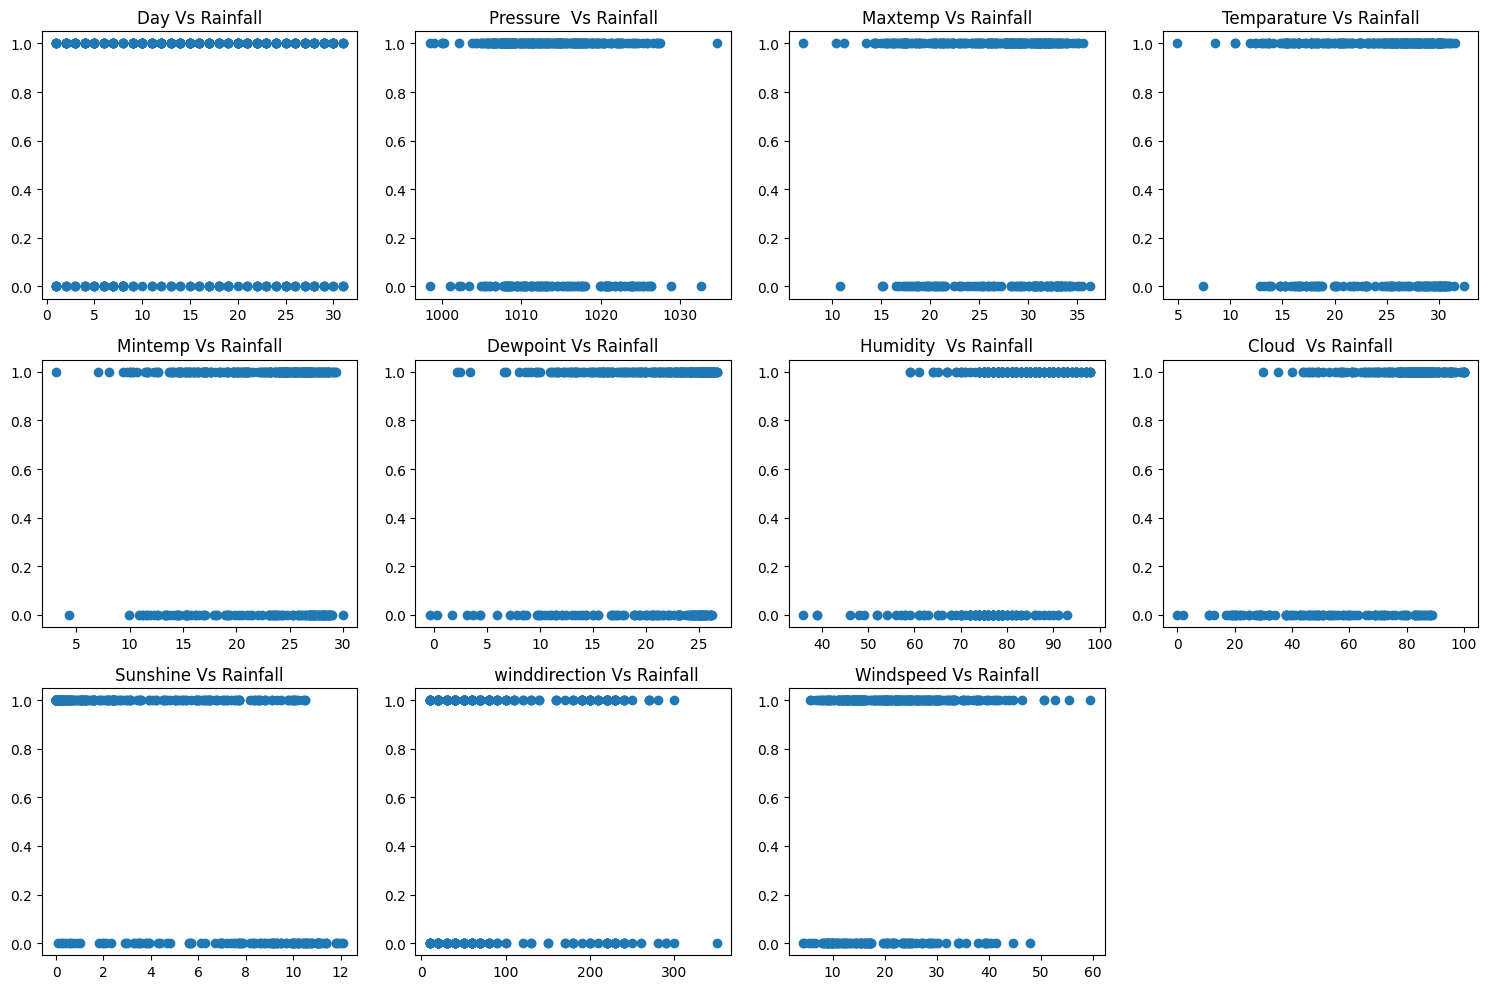

In [10]:
columns = df.columns.to_list()

columns.remove("rainfall")

plt.figure(figsize = (15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    plt.scatter(x=df[column], y=df["rainfall"])
    plt.title(f"{column.capitalize()} Vs Rainfall")

plt.tight_layout()
plt.show()

In [11]:
df.corr()["rainfall"]

day                       0.010339
pressure                 -0.089275
maxtemp                  -0.101003
temparature              -0.037360
mintemp                  -0.007697
dewpoint                  0.139916
humidity                  0.489623
cloud                     0.625766
rainfall                  1.000000
sunshine                 -0.552519
         winddirection   -0.013214
windspeed                 0.154488
Name: rainfall, dtype: float64

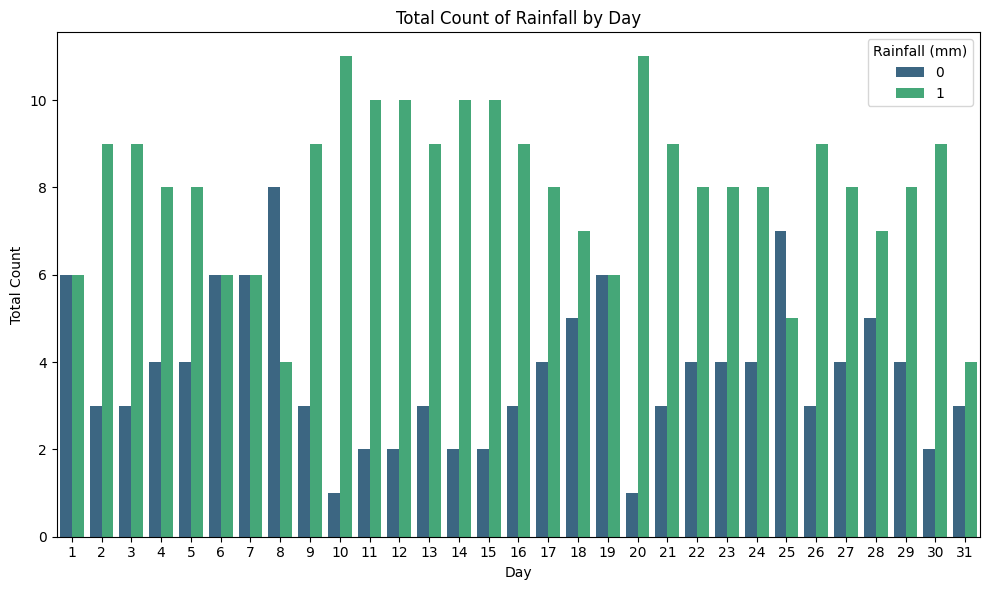

In [18]:
days_rainfall = df.groupby(["day", "rainfall"])["rainfall"].count().reset_index(name="total").sort_values(by="total", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=days_rainfall, x="day", y="total", hue="rainfall", palette="viridis")
plt.title("Total Count of Rainfall by Day")
plt.xlabel("Day")
plt.ylabel("Total Count")
plt.legend(title="Rainfall (mm)")
plt.tight_layout()
plt.show()

In [19]:
df = df.dropna()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X = scaler.fit_transform(df.drop(["maxtemp", "mintemp","temparature","rainfall"], axis=1))
y = df["rainfall"]

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, confusion_matrix, classification_report, accuracy_score, recall_score

models = [LogisticRegression(random_state=42), SVC(random_state=42), RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42)]


for model in models:

  name = model.__class__.__name__
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)


  print(f"Model: {name}")
  acc_train = accuracy_score(y_train, y_pred_train)
  f1_train = f1_score(y_train, y_pred_train)
  precision_train = precision_score(y_train, y_pred_train)
  recoll_train = recall_score(y_train, y_pred_train)
  con_train = confusion_matrix(y_train, y_pred_train)

  
  print("-------------Train----------------")
  print("Accuracy: ", acc_train)
  print("F1 Score: ", f1_train)
  print("Precision Score: ", precision_train)
  print("Recall Score: ", recoll_train)
  print("Confusion Matrix: ", con_train)

  acc_test = accuracy_score(y_test, y_pred_test)
  f1_test = f1_score(y_test, y_pred_test)
  precision_test = precision_score(y_test, y_pred_test)
  recoll_test = recall_score(y_test, y_pred_test)
  con_test = confusion_matrix(y_test, y_pred_test)
  
  print("---------Test----------------")
  print("Accuracy: ", acc_test)
  print("F1 Score: ", f1_test)
  print("Precision Score: ", precision_test)
  print("Recall Score: ", recoll_test)
  print("Confusion Matrix: ", con_test)
  print("----------------------------")


Model: LogisticRegression
-------------Train----------------
Accuracy:  0.832258064516129
F1 Score:  0.8779342723004695
Precision Score:  0.8538812785388128
Recall Score:  0.9033816425120773
Confusion Matrix:  [[ 71  32]
 [ 20 187]]
---------Test----------------
Accuracy:  0.7636363636363637
F1 Score:  0.8433734939759037
Precision Score:  0.8333333333333334
Recall Score:  0.8536585365853658
Confusion Matrix:  [[ 7  7]
 [ 6 35]]
----------------------------
Model: SVC
-------------Train----------------
Accuracy:  0.8548387096774194
F1 Score:  0.8960739030023095
Precision Score:  0.8584070796460177
Recall Score:  0.9371980676328503
Confusion Matrix:  [[ 71  32]
 [ 13 194]]
---------Test----------------
Accuracy:  0.7454545454545455
F1 Score:  0.8333333333333334
Precision Score:  0.813953488372093
Recall Score:  0.8536585365853658
Confusion Matrix:  [[ 6  8]
 [ 6 35]]
----------------------------
Model: RandomForestClassifier
-------------Train----------------
Accuracy:  1.0
F1 Score:  1.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, confusion_matrix, classification_report, accuracy_score, recall_score

best_model = SVC(random_state=42)
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
con_train = confusion_matrix(y_train, y_pred_train)

  

acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
con_test = confusion_matrix(y_test, y_pred_test)


data={
    "Metric":["Accuracy", "Recall", "Precision", "F1 Score"],
    "Train":[acc_train, recall_train, precision_train, f1_train],
    "Test":[acc_test, recall_test, precision_test, f1_test]
}

pd.DataFrame(data)

,Metric,Train,Test
0,Accuracy,0.854839,0.745455
1,Recall,0.937198,0.853659
2,Precision,0.858407,0.813953
3,F1 Score,0.896074,0.833333


In [29]:
import joblib


joblib.dump(best_model, 'rainfall_svm_model.pkl')


loaded_model = joblib.load('rainfall_svm_model.pkl')

In [31]:
y_pred_test = loaded_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
con_test = confusion_matrix(y_test, y_pred_test)


data={
    "Metric":["Accuracy", "Recall", "Precision", "F1 Score"],
    "Test":[acc_test, recall_test, precision_test, f1_test]
}

pd.DataFrame(data)

,Metric,Test
0,Accuracy,0.745455
1,Recall,0.853659
2,Precision,0.813953
3,F1 Score,0.833333


In [51]:
test_df = pd.DataFrame({
    'day': [1],           
    'pressure': [1012.5],        
    'dewpoint': [15.3],    
    'humidity': [78],             
    'cloud': [5],               
    'sunshine': [8.5],           
    'winddirection': [315.0],      
    'windspeed': [12.4]         
})


test_df = scaler.fit_transform(test_df)


""" Expected 0 """
loaded_model.predict(test_df)

array([1], dtype=int64)